Advantages of TensorFlow:

- Mature Ecosystem: TensorFlow has been around longer and has a more mature ecosystem. It has a wide range of libraries, tools, and resources, making it suitable for various applications.

- Deployment and Production: TensorFlow offers production-ready tools like TensorFlow Serving and TensorFlow Lite for deploying models to production environments and mobile devices.

- Scalability: TensorFlow provides distributed computing capabilities, including TensorFlow Distributed, TensorFlow Dataflow, and TensorFlow on Spark, making it well-suited for large-scale projects.

- High-Level APIs: TensorFlow provides high-level APIs like Keras (which is integrated into TensorFlow) that make it easy to build and experiment with neural network architectures.

- Graph Compilation: TensorFlow's static computation graph can lead to optimization opportunities and better performance for certain scenarios.

Advantages of PyTorch:

- Dynamic Computational Graph: PyTorch uses a dynamic computation graph, which is more intuitive for debugging and dynamic architectures. It also allows for more flexible and dynamic model building.

- Ease of Use: PyTorch's dynamic nature and Pythonic syntax make it easier to learn, experiment with, and debug. It's often preferred by researchers and practitioners for this reason.

- Tight Integration with Python: PyTorch's tight integration with Python allows for seamless integration with other scientific libraries and tools.

- Strong Community: PyTorch has gained rapid adoption and has a strong and active community that contributes to its development and provides resources and tutorials.

- Research-Oriented: PyTorch is popular among researchers due to its ease of use for rapid prototyping and experimentation.

# Installing Tensorflow


### NOTE: it will take some time!

In [1]:
%pip install --upgrade pip
%pip install tensorflow==2.3.1

^C
Note: you may need to restart the kernel to use updated packages.
     ---------------------------------------- 2.1/2.1 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


  Using cached numpy-1.18.5-cp38-cp38-win_amd64.whl (12.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.3
    Uninstalling numpy-1.23.3:
      Successfully uninstalled numpy-1.23.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\anshi\\anaconda3\\Lib\\site-packages\\~0mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



#### If you see the message below, restart the kernel please from the panel above (Kernels>restart)! 

    'Note: you may need to restart the kernel to use updated packages.'

#### Let's check if you have everything!

In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [2]:
reachout='Please repeat the steps above. If it still does not work, reach out to me (as2738@cornell.edu)'
try:
  import tensorflow
  print('tensorflow is all good!')
except:
  print("An exception occurred in tensorflow installation."+reachout)
try:
  import keras
  print('keras is all good!')
except:
  print("An exception occurred in keras installation."+reachout)

tensorflow is all good!
keras is all good!


Using TensorFlow backend.


In [3]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.enable_eager_execution()
tf.disable_v2_behavior() 
myfirstconst = tf.constant('Hello World')
myfirstconst

Instructions for updating:
non-resource variables are not supported in the long term


<tf.Tensor 'Const:0' shape=() dtype=string>

In [4]:
x = tf.constant(130.272)
x

<tf.Tensor 'Const_1:0' shape=() dtype=float32>

### TF Sessions

Let's create a TensorFlow Session. It can be thought of as a class for running TensorFlow operations. The session encapsulates the environment in which operations take place.
Let's do a quick example:

In [5]:
a = tf.constant(1)
b = tf.constant(5)
with tf.Session() as Session:
    print('TF simple Operations')
    print('Multiply',Session.run(a*b))
    print('Divide',Session.run(a/b))
    print('Add',Session.run(a+b))
    print('Subtract',Session.run(b-a))

TF simple Operations
Multiply 5
Divide 0.2
Add 6
Subtract 4


## Now let's custom build our first neural networks!

In [6]:
import numpy as np
xd = np.linspace(0,10,100) + np.random.uniform(-3,.5,100)
yd = np.linspace(0,10,100) + np.random.uniform(-.5,2,100)

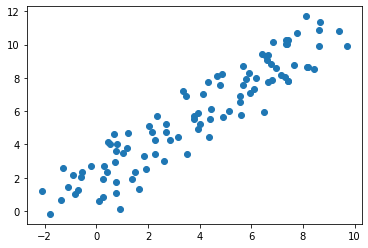

In [7]:
import matplotlib.pyplot as plt
plt.plot(xd,yd,'o')

### Let's define our variables here

$y=m*x+b$

In [8]:
#Let's intialize with a guess
m = tf.Variable(1.0)
b = tf.Variable(0.1)
#Let's build or objective function!
#initialize error
e=0
for x,y in zip(xd,yd):
    #our model
    y_pred = m*x + b
    # our error
    e += (y-y_pred)**2

## tensorflow optimizer 
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001)

## we want to minimize error
training = optimizer.minimize(e)

## initilize our variables with tensorflow
initalize = tf.global_variables_initializer()


#start the session for 1000 epochs!
with tf.Session() as sess:
    
    sess.run(initalize)
    epochs = 100
    
    for i in range(epochs):
        
        sess.run(training)
        

    # Get results
    
    mf, bf = sess.run([m,b])
print("The slope is {} and the intercept is {}".format(mf, bf))

The slope is 1.0804717540740967 and the intercept is 1.217840313911438


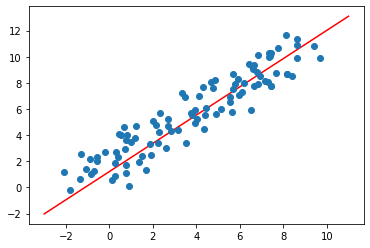

In [9]:
#Let's evalute our results
x_v = np.linspace(-3,11,300)
y_v = mf*x_v + bf
plt.plot(x_v,y_v,'r')
plt.plot(xd,yd,'o')

### Let's do a regression example!
 
 Let's predict fuel efficiency

In [1]:
#The imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from tensorflow.keras.layers.experimental import preprocessing
tf.compat.v1.enable_eager_execution()

In [2]:
#Let's download the data!
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)


In [3]:
dataset = raw_dataset.copy()
dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [4]:
#Let's convert origin to numeric value
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})


In [5]:
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,0,0,1


In [6]:
#let's split the data into training and testing!
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

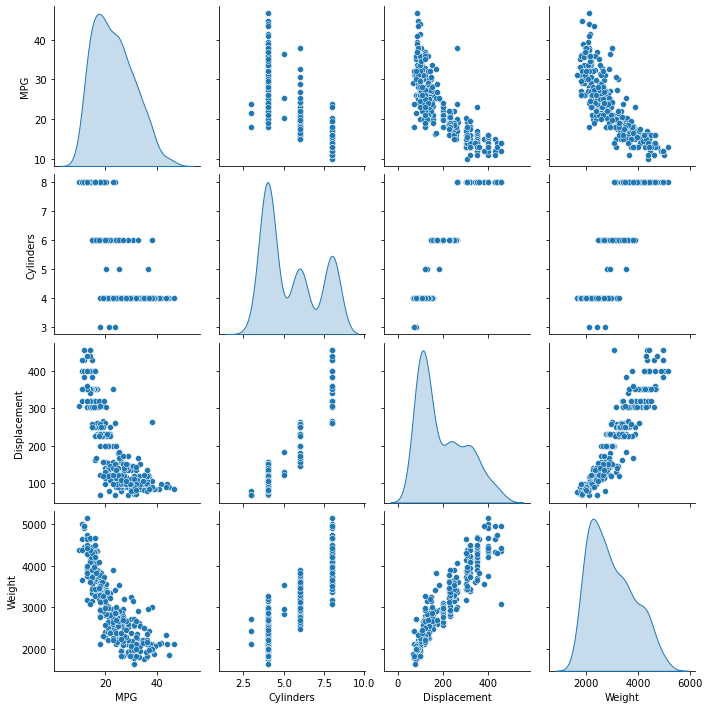

In [7]:
#Let's look at the data
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [8]:
#Let's split the features (x) from the labels (y)
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [9]:

normalizer = preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[5.4777069e+00 1.9531847e+02 1.0486943e+02 2.9902517e+03 1.5559236e+01
 7.5898087e+01 1.7834395e-01 1.9745223e-01 6.2420380e-01]


In [10]:
## Let's do a linear model first!
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.predict(train_features[:10])

array([[ 0.5308424 ],
       [ 0.99613404],
       [ 0.53494567],
       [ 0.42045662],
       [-0.07579607],
       [ 0.6661737 ],
       [-0.05197906],
       [-1.3410947 ],
       [ 0.63736147],
       [ 0.24448073]], dtype=float32)

In [11]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')


In [12]:
%%time
history = linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Wall time: 2.09 s


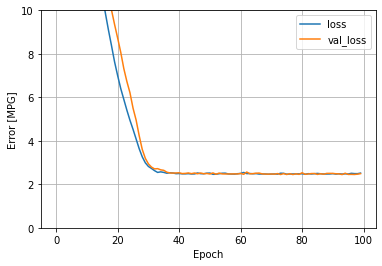

In [13]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

In [14]:
test_results = {}
test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)
print(test_results['linear_model'])

2.4974253177642822


In [15]:
# Let's now try a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_1 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [16]:
%%time
history = dnn_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Wall time: 2.18 s


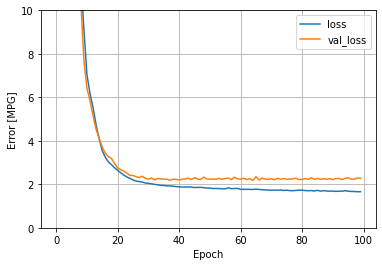

In [17]:
plot_loss(history)

In [18]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)


In [19]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
linear_model,2.497425
dnn_model,1.750778


### Let's do a classification example!
 
 Let's classify images of clothing!

In [20]:
#Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [21]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images.shape

(60000, 28, 28)

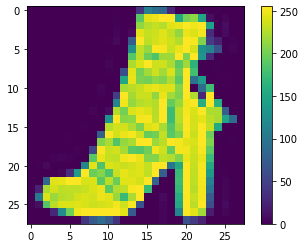

In [22]:
#Let's plot a random image
plt.figure()
plt.imshow(train_images[11])
plt.colorbar()
plt.grid(False)
plt.show()


In [23]:
# Let's normalize our data
train_images = train_images / 255.0

test_images = test_images / 255.0

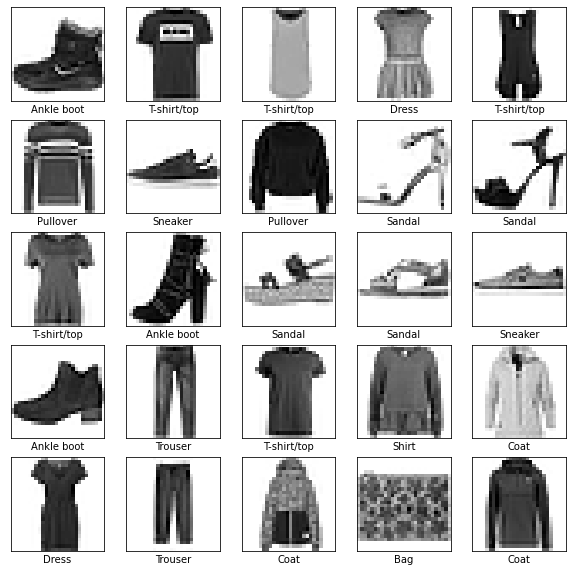

In [24]:
#Let's look at the data
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [25]:
#Now let's build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])


In [26]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [27]:
#train
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 818us/step - loss: 0.4969 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 2s 872us/step - loss: 0.3752 - accuracy: 0.8632
Epoch 3/10
1875/1875 [==============================] - 2s 882us/step - loss: 0.3399 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 2s 870us/step - loss: 0.3129 - accuracy: 0.8842
Epoch 5/10
1875/1875 [==============================] - 1s 776us/step - loss: 0.2957 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 2s 806us/step - loss: 0.2813 - accuracy: 0.8956
Epoch 7/10
1875/1875 [==============================] - 2s 824us/step - loss: 0.2682 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 2s 831us/step - loss: 0.2563 - accuracy: 0.9053
Epoch 9/10
1875/1875 [==============================] - 2s 881us/step - loss: 0.2488 - accuracy: 0.9075
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/

In [28]:
#Let's test its accuracy!
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)


313/313 - 0s - loss: 0.3322 - accuracy: 0.8858

Test accuracy: 0.8858000040054321


In [29]:
#make predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])


In [30]:
predictions = probability_model.predict(test_images)

In [31]:
predictions[0]

array([1.7039261e-07, 5.0871241e-09, 1.7711962e-09, 4.5131312e-11,
       1.1615433e-09, 2.7778005e-04, 3.5095886e-09, 8.6118300e-03,
       1.0211268e-08, 9.9111021e-01], dtype=float32)

In [32]:
np.argmax(predictions[0])

9

In [33]:
test_labels[0]

9

In [34]:
#ax functions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


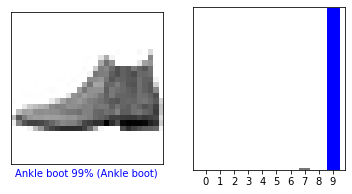

In [35]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

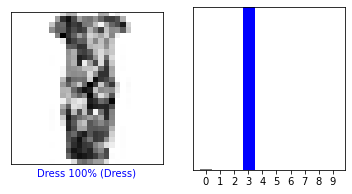

In [36]:
i = 100
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

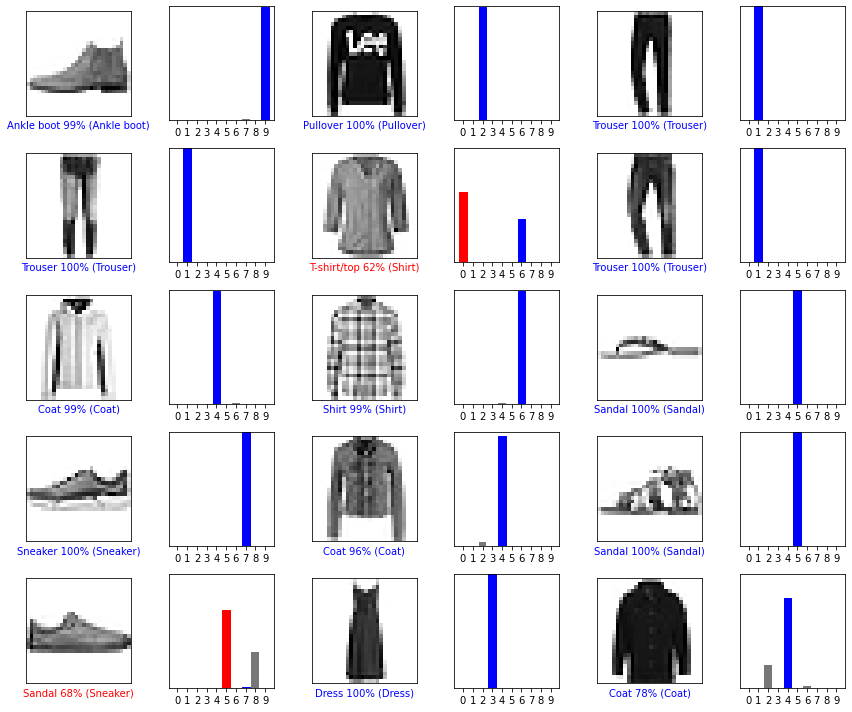

In [37]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Now let's navigate some of the options that we used!

### Layers
We used Dense above, which is just your regular densely-connected NN layer.

    ''' 
    tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
    )
    '''


In [38]:
# Create a `Sequential` model and add a Dense layer as the first layer.
modell = tf.keras.models.Sequential()
modell.add(tf.keras.Input(shape=(16,)))
modell.add(tf.keras.layers.Dense(32, activation='relu'))
# Now the model will take as input arrays of shape (None, 16)
# and output arrays of shape (None, 32).
# Note that after the first layer, you don't need to specify
# the size of the input anymore:
modell.add(tf.keras.layers.Dense(32))
modell.output_shape


(None, 32)

In [39]:
modell.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_7 (Dense)              (None, 32)                1056      
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


More than 30 types of layers in tensorflow, check them here! https://www.tensorflow.org/api_docs/python/tf/keras/layers

### activation functions

In [40]:
#Relu
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
m=tf.keras.activations.relu(foo,alpha=0.0, max_value=4, threshold=0).numpy()
print(m)

[0. 0. 0. 4. 4.]


In [41]:
#elu
# x if x > 0 
# if x<0 alpha * (exp(x) - 1) 
foo = tf.constant([-10, -5, 0.0, 5, 10], dtype = tf.float32)
m=tf.keras.activations.elu(foo,alpha=10).numpy()
print(m)

[-9.999546 -9.932621  0.        5.       10.      ]


In [42]:
#tanh
# tanh(x) = sinh(x)/cosh(x) = ((exp(x) - exp(-x))/(exp(x) + exp(-x))).
foo = tf.constant([-1000, -5, 0.0, 5, 1000], dtype = tf.float32)
m=tf.keras.activations.tanh(foo).numpy()
print(m)

[-1.         -0.99990916  0.          0.99990916  1.        ]


In [43]:
#Sigmoid
# sigmoid(x) = 1 / (1 + exp(-x))
foo = tf.constant([-10000, -5, 0.0, 5, 10000], dtype = tf.float32)
m=tf.keras.activations.sigmoid(foo).numpy()
print(m)

[0.         0.00669286 0.5        0.9933071  1.        ]


For more on activation functions: https://www.tensorflow.org/api_docs/python/tf/keras/activations

### Optimizers 
Let's now go over some 

In [44]:
#Keras basic optimizer
model.compile(optimizer='SGD',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 1s 738us/step - loss: 0.2019 - accuracy: 0.9253
Epoch 2/2
1875/1875 [==============================] - 1s 750us/step - loss: 0.1956 - accuracy: 0.9280


In [45]:
#RMSprop
model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 980us/step - loss: 0.2314 - accuracy: 0.9148
Epoch 2/2
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2320 - accuracy: 0.9147


In [46]:
#Adam
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 942us/step - loss: 0.2260 - accuracy: 0.9165
Epoch 2/2
1875/1875 [==============================] - 2s 871us/step - loss: 0.2148 - accuracy: 0.9200


#### Learning rate scheduler

In [47]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=1,
    decay_rate=0.9,
    staircase=True)

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 1s 684us/step - loss: 0.1971 - accuracy: 0.9261
Epoch 2/3
1875/1875 [==============================] - 1s 685us/step - loss: 0.1967 - accuracy: 0.9264
Epoch 3/3
1875/1875 [==============================] - 1s 755us/step - loss: 0.1967 - accuracy: 0.9264


For more on optimizers: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers

### Loss functions 
Loss functions for regression are different from that for classification

These functions greatly impact the model. Some are harder to optimiz but has a physical meaning to the problem!

Some functions on tensorflow:
class BinaryCrossentropy: Computes the cross-entropy loss between true labels and predicted labels.

<code> class CategoricalCrossentropy </code>: Computes the crossentropy loss between the labels and predictions.

<code>class CategoricalHinge</code>: Computes the categorical hinge loss between y_true and y_pred.

<code>class CosineSimilarity</code>: Computes the cosine similarity between labels and predictions.

<code>class Hinge</code>: Computes the hinge loss between y_true and y_pred.

<code>class KLDivergence</code>: Computes Kullback-Leibler divergence loss between y_true and y_pred.


<code>class MeanAbsoluteError</code>: Computes the mean of absolute difference between labels and predictions.

<code>class MeanAbsolutePercentageError</code>: Computes the mean absolute percentage error between y_true and y_pred.

<code>class MeanSquaredError</code>: Computes the mean of squares of errors between labels and predictions.

<code>class MeanSquaredLogarithmicError</code>: Computes the mean squared logarithmic error between y_true and y_pred.


<code>class SparseCategoricalCrossentropy</code>: Computes the crossentropy loss between the labels and predictions.

<code>class SquaredHinge</code>: Computes the squared hinge loss between y_true and y_pred.

In [48]:
#SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 954us/step - loss: 0.2105 - accuracy: 0.9216
Epoch 2/3
1875/1875 [==============================] - 2s 802us/step - loss: 0.2037 - accuracy: 0.9234
Epoch 3/3
1875/1875 [==============================] - 2s 855us/step - loss: 0.2010 - accuracy: 0.9244


In [49]:
#SparseCategoricalCrossentropy
model.compile(optimizer='adam',
              loss=tf.keras.losses.Hinge(),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 987us/step - loss: 0.8379 - accuracy: 0.1350
Epoch 2/2
1875/1875 [==============================] - 2s 897us/step - loss: 0.1018 - accuracy: 0.1007


In [50]:
#BinaryCrossentropy (not applicable)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])
#train
model.fit(train_images, train_labels, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 2s 1ms/step - loss: -53.2934 - accuracy: 0.1006
Epoch 2/2
1875/1875 [==============================] - 2s 949us/step - loss: -53.4751 - accuracy: 0.1105


For more on loss functions: https://www.tensorflow.org/api_docs/python/tf/keras/losses

### Metrics 
Metrics do not impact the performance of the model or the optimization process. They are there to help you evaluate the performance of the model, but they are different from regression to calssification. 

https://www.tensorflow.org/api_docs/python/tf/keras/metrics

for example 
<code> class CategoricalHinge </code>: Computes the categorical hinge metric between y_true and y_pred.

In [51]:
#Hinge(not applicable)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['CategoricalHinge'])
#train
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 2s 1ms/step - loss: 2.1987 - categorical_hinge: 1011.0234


In [52]:
#(not useful)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['MeanSquaredError'])
#train
model.fit(train_images, train_labels, epochs=1)

1875/1875 [==============================] - 2s 849us/step - loss: 2.2558 - mean_squared_error: 1765.0131


References:
    - François Chollet
    - Tensorflow.org